# Loan Prediction

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('train.csv')

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Exploratory Data Analysis. Data Exploration and Preparation.

1. Variable Identification
2. Univariate Analysis
3. Bi-variate Analysis
4. Missing values treatment
5. Outliter treatment
6. Variable transformation
7. Variable creation

### 1. Variable Identification

1. Identify predictor and target variables;
2. Identify data type of the variables;
3. Identify category of the variables.

In [6]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### 1. Identify predictor and target variables.

**Predictor variables.**

* Gender
* Married
* Dependents
* Education
* Self_Employed
* ApplicantIncome
* CoapplicantIncome
* LoanAmount
* Loan_Amount_Term
* Credit_History
* Property_Area

**Target variable.**

* Loan_Status

#### 2. Identify data type of the variables.

**Character.**

* Gender
* Married
* Education
* Self_Employed
* Property_Area
* Loan_Status

**Numeric.**

* Dependents
* ApplicantIncome
* CoapplicantIncome
* LoanAmount
* Loan_Amount_Term
* Credit_History

#### 3. Identify categories of the variables.

**Categorical.**

* Gender
* Married
* Education
* Self_Employed
* Property_Area
* Loan_Status
* Dependents
* Credit_History

**Continuous.**

* ApplicantIncome
* CoapplicantIncome
* LoanAmount
* Loan_Amount_Term

## 2. Univariate Analysis

In [21]:
continuous_variables = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
categorical_variables = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status',
                         'Dependents', 'Credit_History']

### Continuous Variables

In [25]:
train[continuous_variables].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


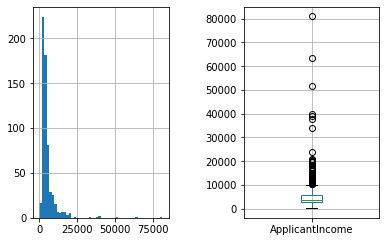

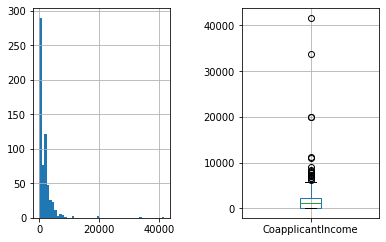

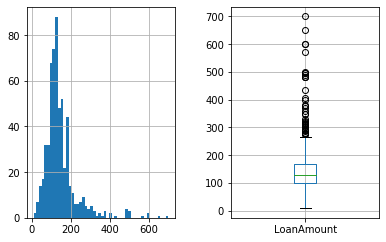

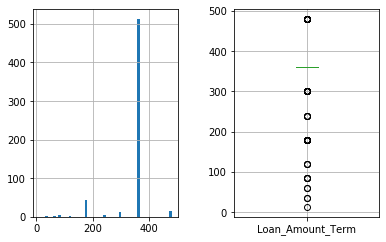

In [24]:
for continuous in continuous_variables: 
    plt.subplot(1, 2, 1);
    train[continuous].hist(bins=50);
    plt.subplot(1, 2, 2);
    train.boxplot(column=[continuous]);
    plt.tight_layout(pad=3.0)
    plt.show()

### Categorical Variables

In [49]:
def analyze_categorical(variable, df):
    counts = pd.concat((df[variable].value_counts(), df[variable].value_counts(normalize=True)), 
              axis=1, keys=('Counts', 'Percentage'))
    print(counts)
    df[variable].value_counts().plot.bar()
    plt.show()

        Counts  Percentage
Male       489    0.813644
Female     112    0.186356


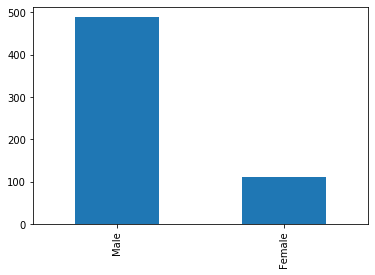

In [50]:
analyze_categorical('Gender', train)

For Gender
        Counts  Percentage
Male       489    0.813644
Female     112    0.186356


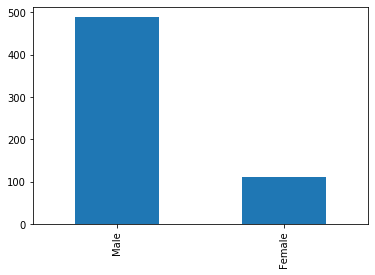

For Married
     Counts  Percentage
Yes     398    0.651391
No      213    0.348609


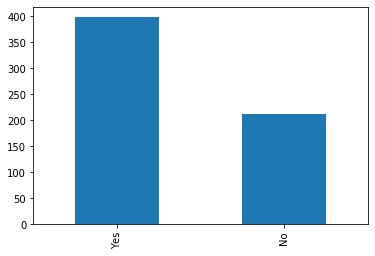

For Education
              Counts  Percentage
Graduate         480    0.781759
Not Graduate     134    0.218241


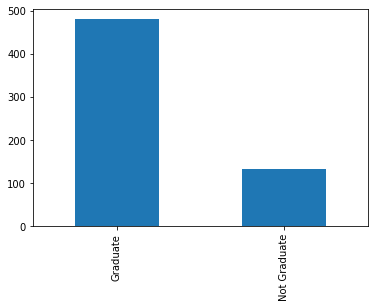

For Self_Employed
     Counts  Percentage
No      500    0.859107
Yes      82    0.140893


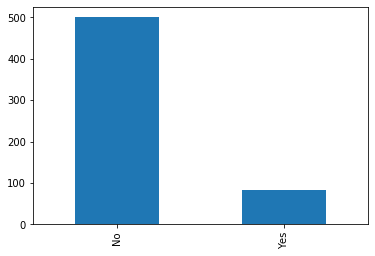

For Property_Area
           Counts  Percentage
Semiurban     233    0.379479
Urban         202    0.328990
Rural         179    0.291531


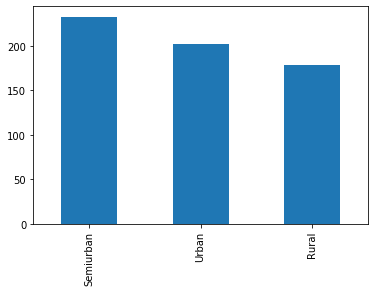

For Loan_Status
   Counts  Percentage
Y     422    0.687296
N     192    0.312704


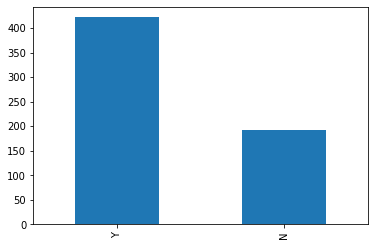

For Dependents
    Counts  Percentage
0      345    0.575960
1      102    0.170284
2      101    0.168614
3+      51    0.085142


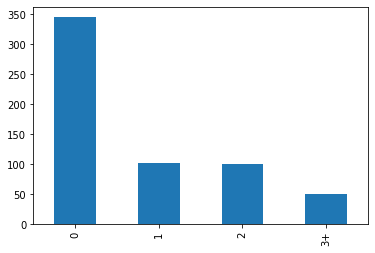

For Credit_History
     Counts  Percentage
1.0     475    0.842199
0.0      89    0.157801


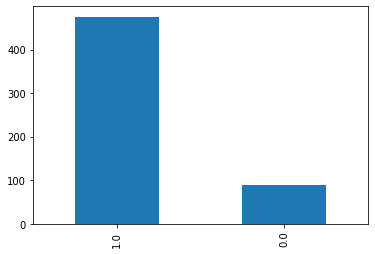

In [52]:
for variable in categorical_variables:
    print(f'For {variable}')
    analyze_categorical(variable, train)